# ⬇️ Importações e coleta de dados

###  Importando bibliotecas

Aqui é o local onde eu vou concentrar todas as importações ao longo dos desafios.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

### Importando o conjunto de dados

Observação: A coluna "Unnamed: 0" é criada pelo pandas quando nenhum cabeçalho é fornecido ou quando há uma coluna adicional de índice de linha sem nome no arquivo CSV. Para evitar que a coluna "Unnamed: 0" apareça ao ler um arquivo CSV com o pandas, você pode especificar qual coluna é o índice do DataFrame usando o parâmetro `index_col` da função read_csv()

In [2]:
dados_musicas = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv', index_col=0)
dados_musicas.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
#Verificando quantidade de linhas, colunas e tipos
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
# Extraindo a descrição dos atributos numéricos
dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# 🔎 Análise Exploratória dos Dados

A análise exploratória de dados é uma abordagem para analisar conjuntos de dados e resumir suas características principais, geralmente com métodos visuais. 

## Descrição dos dados

Vamos ver como os dados estão dispostos, checando suas dimensões e se há dados faltantes.

In [5]:
# visualizando suas dimensões
dados_musicas.shape

(114000, 20)

In [6]:
# visualizando a quantidade em cada linha e seu formato
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Podemos observar que existem features númericas e categóricas. 

## Análises estatísticas

Vamos dar uma olhada inicial nas principais estatísticas descritivas. Uma análise descritiva é um primeiro passo importante para a realização de análises estatísticas, pois nos dá uma idéia da distribuição dos nossos dados e ajuda-nos a detectar outliers.

In [7]:
# visualizando as estatísticas
dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


O dataset possui 113.550 entradas.

In [8]:
# Artistas únicos e contagem de músicas por artista
print(dados_musicas['artists'].unique().shape)
print(dados_musicas['artists'].value_counts())

(31438,)
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64


## Verificando valores ausentes

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(dados_musicas.isnull().sum() / dados_musicas.shape[0]).sort_values(ascending=False)

album_name          0.000009
track_name          0.000009
artists             0.000009
track_id            0.000000
speechiness         0.000000
time_signature      0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
loudness            0.000000
mode                0.000000
key                 0.000000
energy              0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
track_genre         0.000000
dtype: float64

In [10]:
dados_musicas.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"colunas":[],"quant_isnull":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["quant_isnull"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45);

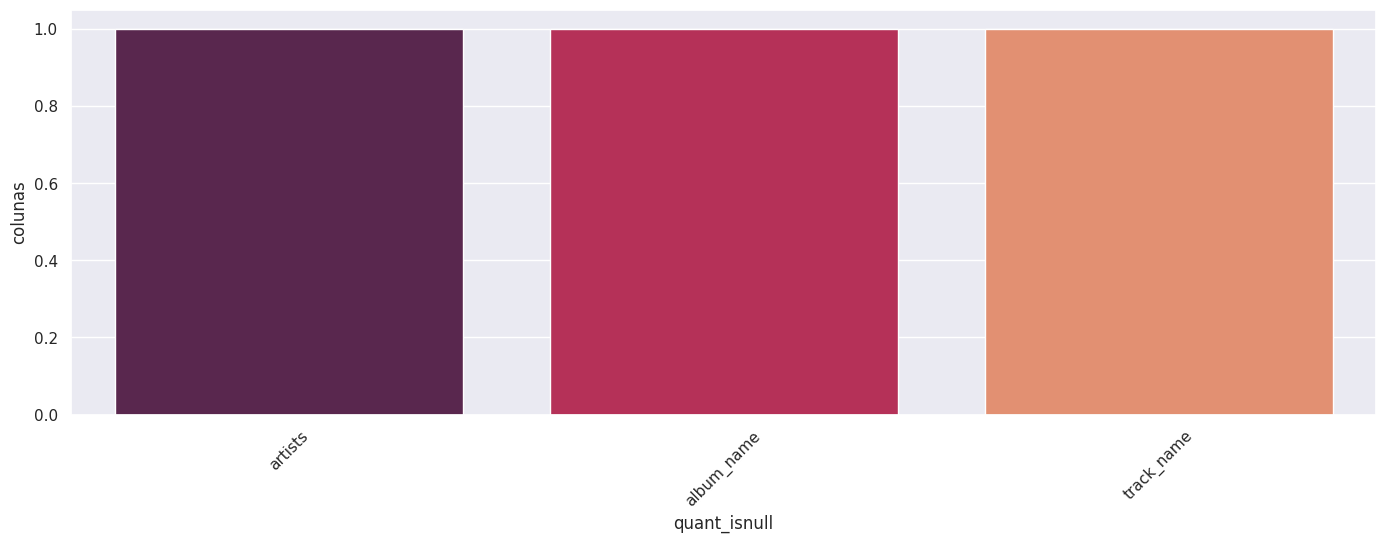

In [12]:
missing_visualization(dados_musicas)

Podemos observar que temos valores ausentes no nosso dataset. Mais a frente precisaremos tratá-los.

## Respondendo algumas perguntas sobre nossos dados

In [13]:
#As 100 músicas mais populares versus todo o conjunto de dados

sorted_df = dados_musicas.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


In [14]:
dados_musicas.isna().sum() #check for null values

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
dados_musicas.isna().sum() #check for null values

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [16]:
dados_musicas.shape

(114000, 20)

In [17]:
dados_musicas.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [18]:
dados_musicas.duration_ms

0         230666
1         149610
2         210826
3         201933
4         198853
           ...  
113995    384999
113996    385000
113997    271466
113998    283893
113999    241826
Name: duration_ms, Length: 114000, dtype: int64

In [19]:
# dados_musicas["duration_ms"]= dados_musicas["duration_ms"].replace("durations_ms", )
# dados_musicas

In [44]:
artistas_popularidade = dados_musicas[['artists', 'popularity']]
artistas_populares = artistas_popularidade.groupby("artists").mean().sort_values(by='popularity', ascending=False).reset_index()

#Trazendo somente os 5 primeiros
artistas_populares = artistas_populares.head()
artistas_populares

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,94.5


In [ ]:
# Buscar entender melhor os outliers!

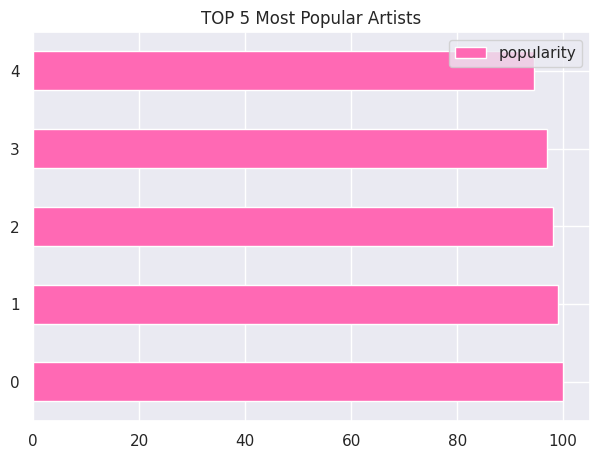

In [43]:
artistas_populares.plot.barh(color="hotpink") ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

In [40]:
# #Top 5 artistas populares

# popular_artists = dados_musicas.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
# popular_artists

In [ ]:
#top 5 longest songs or tracks

long_songs = dados_musicas[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897
13344,House of Om - Mark Farina - Continuous Mix,4447520


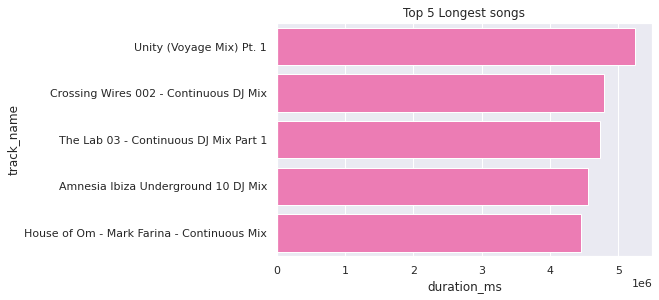

In [ ]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs, color = 'hotpink')
plt.title("Top 5 Longest songs")
plt.show()

In [ ]:
#Top 5 most trending genre

trend_genre = dados_musicas[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
20008,dance,98
30003,edm,98


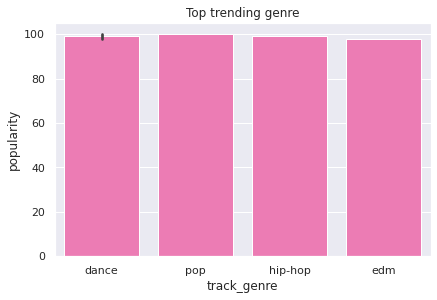

In [ ]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre, color = 'hotpink')
plt.title("Top trending genre")
plt.show()

In [ ]:
#Top 5 most danceable songs

danceable = dados_musicas[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
13353,Bitches,dj funk,0.981


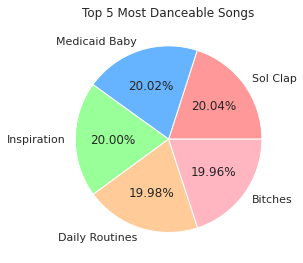

In [ ]:
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb6c1']

plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name, colors = colors)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [ ]:
#Encontrando correlação entre as variáveis

dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
corr_table = dados_musicas.corr(method="pearson") #get variables the correlation

In [ ]:
corr_table

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007899,0.043941,0.034412,-0.002444,-0.004174,0.047371,-0.014991,-0.045459,-0.022370,-0.094711,-0.005658,-0.041109,0.012180,0.030564
duration_ms,-0.007899,1.000000,-0.065997,-0.074108,0.058163,0.008510,-0.004228,-0.035935,-0.063188,-0.103695,0.125307,0.010213,-0.154810,0.024301,0.018347
explicit,0.043941,-0.065997,1.000000,0.122180,0.096257,0.004842,0.107989,-0.037383,0.307456,-0.093751,-0.103168,0.032368,-0.003782,-0.003098,0.038234
danceability,0.034412,-0.074108,0.122180,1.000000,0.131695,0.036544,0.256559,-0.069778,0.108237,-0.169183,-0.183972,-0.131648,0.476750,-0.051518,0.207369
energy,-0.002444,0.058163,0.096257,0.131695,1.000000,0.048046,0.760624,-0.079328,0.141976,-0.732745,-0.179966,0.184812,0.258448,0.247360,0.186671
key,-0.004174,0.008510,0.004842,0.036544,0.048046,1.000000,0.038358,-0.135876,0.020819,-0.041119,-0.006821,-0.001521,0.034237,0.010905,0.015123
loudness,0.047371,-0.004228,0.107989,0.256559,0.760624,0.038358,1.000000,-0.042071,0.060088,-0.588110,-0.432108,0.076793,0.279424,0.212180,0.191648
mode,-0.014991,-0.035935,-0.037383,-0.069778,-0.079328,-0.135876,-0.042071,1.000000,-0.046770,0.096534,-0.050780,0.013909,0.021399,0.000364,-0.024367
speechiness,-0.045459,-0.063188,0.307456,0.108237,0.141976,0.020819,0.060088,-0.046770,1.000000,-0.001381,-0.089213,0.205092,0.036391,0.017166,-0.000398
acousticness,-0.022370,-0.103695,-0.093751,-0.169183,-0.732745,-0.041119,-0.588110,0.096534,-0.001381,1.000000,0.102129,-0.020321,-0.106228,-0.207613,-0.175618


Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Ao examinar a correlação, podemos determinar se as variáveis estão positivamente correlacionadas (ou seja, quando uma aumenta, a outra também aumenta), negativamente correlacionadas (quando uma aumenta, a outra diminui) ou não correlacionadas (quando não há relação aparente entre as variáveis).

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

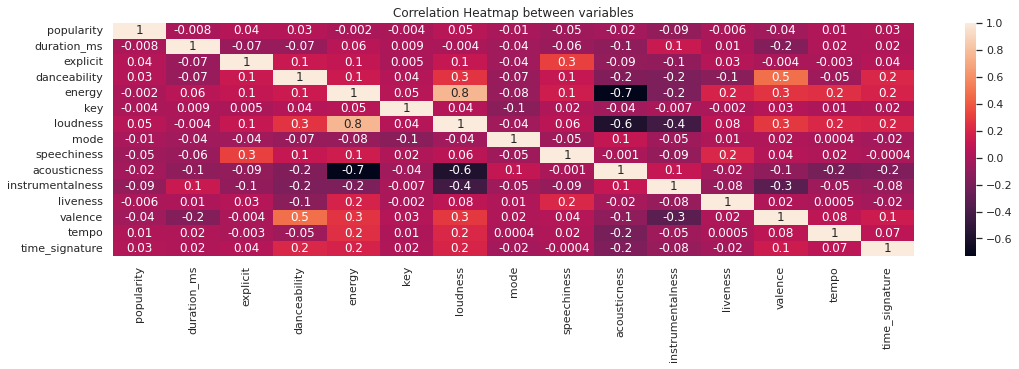

In [ ]:
#Plotando a tabela de correlação usando o Seaborn.
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #mostrando o plot

Podemos ver que a feature `loudness` e `energia` possuem uma alta correlação. Ou seja, quando uma aumenta, a outra também aumenta.